In [19]:
import string
import matplotlib.pyplot as plt

In [20]:
s='plaksha'
print(s.find('p'))
print(s.replace('pl','r'))

0
raksha


In [21]:
def textstrip(filename):
    '''This takes the file and converts it to a string with all the spaces and other
    special characters removed. What remains is only the lower case letters,
    retain only the lowercase letters!
    '''
    s=''
    with open(filename, 'r', encoding='utf-8') as f:
        while True:
            c = f.read(1)
            if c:
                if ord(c)>=97 and ord(c)<=122:
                    s=s+c
                elif ord(c)>=65 and ord(c)<=90:   # Unicode for letters A-Z
                    s=s+chr(ord(c)+32)
            else:
                break
    return s


In [22]:
def letter_distribution(s):
    '''Consider the string s which comprises of only lowercase letters. Count
    the number of occurrences of each letter and return a dictionary'''
    d = {}
    for c in s:
        if c in d.keys():
            d[c]+=1
        else:
            d[c] = 1
    return d

In [23]:
def substitution_encrypt(s,d):
    '''encrypt the contents of s by using the dictionary d which comprises of
    the substitutions for the 26 letters. Return the resulting string'''
    d = {val:key for key,val in d.items()}            # Reverse the dictionary used for encryption
    new_s = ''
    for char in s:
        if char in d:
            new_s+=d[char]
    return new_s
    

In [24]:
def substitution_decrypt(s,d):
    '''decrypt the contents of s by using the dictionary d which comprises of
    the substitutions for the 26 letters. Return the resulting string'''
    new_s = ''
    for char in s:
        if char in d:
            new_s+=d[char]
    return new_s
    

In [25]:
def cryptanalyse_substitution(s):
    '''Given that the string s is given to us and it is known that it was
    encrypted using some substitution cipher, predict the d'''
    dist = letter_distribution(s)
    max_letter = max(dist, key=lambda x:dist[x])    # Find the key with the max value
    key = ord(max_letter) - ord('e')                # 'e' is the most common letter in text
    pred_decrypt = ''
    for char in s:
        pred_decrypt+= chr((ord(char)-97-key+26)%26 + 97)
    return pred_decrypt


In [26]:
def vigenere_encrypt(s,password):
    '''Encrypt the string s based on the password the vigenere cipher way and
    return the resulting string'''
    len_pass = len(password)
    vig_enc = ''
    i=0
    for char in s:
        vig_enc+= chr(97+(ord(char) -97 + ord(password[i]) -97)%26)
        i=(i+1)%len_pass
    return vig_enc

In [27]:
def vigenere_decrypt(s,password):
    '''Decrypt the string s based on the password the vigenere cipher way and
    return the resulting string'''
    len_pass = len(password)
    vig_dec = ''
    i=0
    for char in s:
        vig_dec+= chr(97+(ord(char) - ord(password[i])+26)%26)
        i=(i+1)%len_pass
    return vig_dec

In [28]:
def rotate_compare(s,r):
    '''This rotates the string s by r places and compares s(0) with s(r) and
    returns the proportion of collisions'''
    rotated = s[-r:]+s[:-r]
    collisions = 0
    for c1,c2 in list(zip(s,rotated)):
        if c1==c2:
            collisions+=1

    return collisions/len(s)

In [29]:
def cryptanalyse_vigenere_afterlength(s,k):
    '''Given the string s which is known to be vigenere encrypted with a
    password of length k, find out what is the password'''
    sub_s = ['']*k
    for i in range(len(s)):
        sub_s[i%k]+=s[i]

    final_decrypted = []
    for caesar in sub_s:
        final_decrypted.append(cryptanalyse_substitution(caesar))
    
    max_len = len(max(final_decrypted, key=lambda x:len(x)))
    vig_dec_fin = ''
    for i in range(max_len):
        for j in final_decrypted:
            if i < len(j):
                vig_dec_fin+=j[i]

    return vig_dec_fin


In [30]:
"""
def get_ioc(s):
    '''
    Gives the index of coincidence of a particular text.
    '''
    len_text = len(s)
    denominator = len_text*(len_text-1)
    d = letter_distribution(s)
    numerator=0
    for i in d.values():
        numerator+=(i*(i-1))
    ioc = numerator/denominator
    return ioc
def cryptanalyse_vigenere_findlength(s):
    '''Given just the string s, find out the length of the password using which
    some text has resulted in the string s. We just need to return the number
    k'''
    min_ioc = 1
    key_length = -1
    #dct = {i:0 for i in range(2,10)}
    for i in range(2,10):
        avg_ioc = 0
        str_list = ['']*i
        for j in range(len(s)):
            str_list[j%i]+=s[j]
        for caesar in str_list:
            avg_ioc+=get_ioc(caesar)
        avg_ioc/=i
        
        #dct[i] = avg_ioc
        if abs(avg_ioc-0.068) < abs(min_ioc-0.068):
            min_ioc = avg_ioc
            key_length = i
    return key_length
"""
def cryptanalyse_vigenere_findlength(s):
    '''Given just the string s, find out the length of the password using which
    some text has resulted in the string s. We just need to return the number
    k'''
    X = list(range(1,100))
    y = [rotate_compare(s,1)]
    first_flag = True
    y_prev = y[-1]
    key_length = -1
    for i in range(2,100):
        y.append(rotate_compare(s,i))
        if y_prev == 0.0:
            if y[-1] - y_prev > 0.04 and first_flag:
                first_flag = False
                key_length = i
        else:
            if y[-1] > y_prev*1.5 and first_flag:
                first_flag = False
                key_length = i
        y_prev = y[-1]
    plt.bar(X, y)
    plt.show()
    return key_length


In [31]:
def cryptanalyse_vigenere(s):
    '''Given the string s cryptanalyse vigenere, output the password as well as
    the plaintext'''
    key_length = cryptanalyse_vigenere_findlength(s)
    vig_dec = cryptanalyse_vigenere_afterlength(s, key_length)
    return vig_dec

Lowercase: contentschaptermrsherlockholmeschapterthecurseofthebaskervilleschaptertheproblemchaptersirhenrybaskervillechapterthreebrokenthreadschapterbaskervillehallchapterthestapletonsofmerripithousechapterfirstreportofdrwatsonchapterthelightuponthemoorsecondreportofdrwatsonchapterextractfromthediaryofdrwatsonchapterthemanonthetorchapterdeathonthemoorchapterfixingthenetschapterthehoundofthebaskervilleschapteraretrospectionchaptermrsherlockholmesmrsherlockholmeswhowasusuallyverylateinthemorningssaveuponthosenotinfrequentoccasionswhenhewasupallnightwasseatedatthebreakfasttableistooduponthehearthrugandpickedupthestickwhichourvisitorhadleftbehindhimthenightbeforeitwasafinethickpieceofwoodbulbousheadedofthesortwhichisknownasapenanglawyerjustundertheheadwasabroadsilverbandnearlyaninchacrosstojamesmortimermrcsfromhisfriendsofthecchwasengraveduponitwiththedateitwasjustsuchastickastheoldfashionedfamilypractitionerusedtocarrydignifiedsolidandreassuringwellwatsonwhatdoyoumakeofitholmeswassittingw

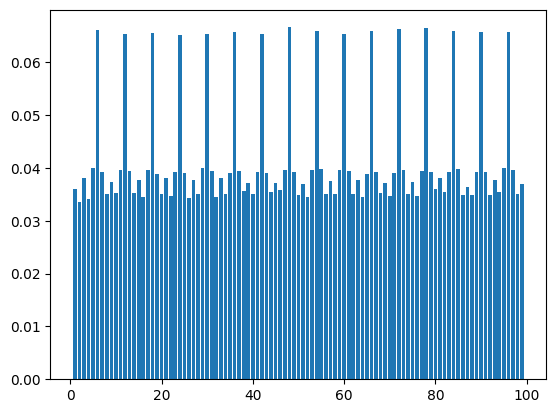

Key Length: 6


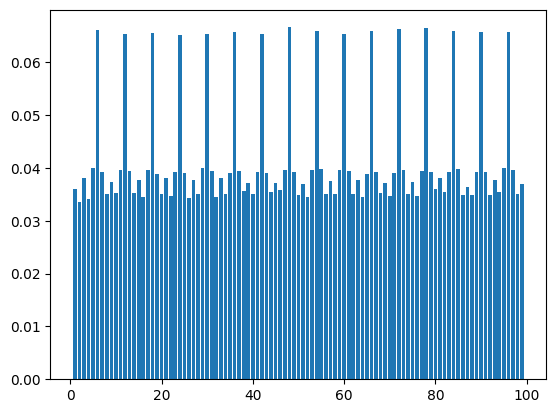

Vigenere Decrypted No Key: contentschaptermrsherlockholmeschapterthecurseofthebaskervilleschaptertheproblemchaptersirhenrybaskervillechapterthreebrokenthreadschapterbaskervillehallchapterthestapletonsofmerripithousechapterfirstreportofdrwatsonchapterthelightuponthemoorsecondreportofdrwatsonchapterextractfromthediaryofdrwatsonchapterthemanonthetorchapterdeathonthemoorchapterfixingthenetschapterthehoundofthebaskervilleschapteraretrospectionchaptermrsherlockholmesmrsherlockholmeswhowasusuallyverylateinthemorningssaveuponthosenotinfrequentoccasionswhenhewasupallnightwasseatedatthebreakfasttableistooduponthehearthrugandpickedupthestickwhichourvisitorhadleftbehindhimthenightbeforeitwasafinethickpieceofwoodbulbousheadedofthesortwhichisknownasapenanglawyerjustundertheheadwasabroadsilverbandnearlyaninchacrosstojamesmortimermrcsfromhisfriendsofthecchwasengraveduponitwiththedateitwasjustsuchastickastheoldfashionedfamilypractitionerusedtocarrydignifiedsolidandreassuringwellwatsonwhatdoyoumakeofith

In [32]:
#1
s = textstrip('sherlock.txt')
print("Lowercase:", s)

#2
dist = letter_distribution(s) 
print("Distribution:", sorted(dist, key=lambda x:dist[x]))

#3
#sub_encrypt_string = 'tdlofagjkricvpwuxybezqsnmh'
n = 8
d = {chr(i):chr(97+((i-97+n)%26)) for i in range(97,123)}
sub_encrypted = substitution_encrypt(s,d)
print("Substitution Encrypted:", sub_encrypted)

#4
sub_decrypted = substitution_decrypt(sub_encrypted, d)
print("Substitution Decrypted:", sub_decrypted)

#5
sub_decrypted_no_key = cryptanalyse_substitution(sub_encrypted)
print("Decrypted No Key:", sub_decrypted_no_key)

#6
password = 'russia'
vigenere_encrypted = vigenere_encrypt(s, password)
print("Vigenere Encrypted:", vigenere_encrypted)

#7
vigenere_decrypted = vigenere_decrypt(vigenere_encrypted, password)
print("Vigenere Decrypted:", vigenere_decrypted)

#8
collision_proportion = rotate_compare(vigenere_encrypted, 1)
print("Collision Proportion for 1 rotation:", collision_proportion)

#9
vig_decrypt_len = cryptanalyse_vigenere_afterlength(vigenere_encrypted, len(password))
print("Vigenere Cryptanalyze With Length:", vig_decrypt_len)

#10
key_length = cryptanalyse_vigenere_findlength(vigenere_encrypted)
print("Key Length:", key_length)

#11
vig_decrypt_no_key = cryptanalyse_vigenere(vigenere_encrypted)
print("Vigenere Decrypted No Key:", vig_decrypt_no_key)
